In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

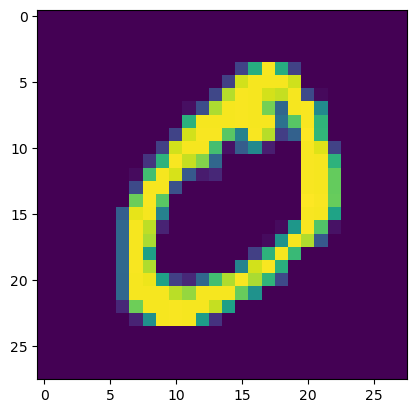

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [7]:
x_train = norm_func(x_train)
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)) )
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=13, batch_size=128, validation_split=0.2)

Epoch 1/13


375/375 [==============================] - 1s 2ms/step - loss: 0.3907 - accuracy: 0.8945 - val_loss: 0.2097 - val_accuracy: 0.9429
Epoch 2/13
375/375 [==============================] - 1s 2ms/step - loss: 0.1805 - accuracy: 0.9479 - val_loss: 0.1562 - val_accuracy: 0.9541
Epoch 3/13
375/375 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9623 - val_loss: 0.1297 - val_accuracy: 0.9647
Epoch 4/13
375/375 [==============================] - 1s 3ms/step - loss: 0.1019 - accuracy: 0.9709 - val_loss: 0.1106 - val_accuracy: 0.9660
Epoch 5/13
375/375 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9767 - val_loss: 0.0984 - val_accuracy: 0.9713
Epoch 6/13
375/375 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9811 - val_loss: 0.0977 - val_accuracy: 0.9696
Epoch 7/13
375/375 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9840 - val_loss: 0.0937 - val_accuracy: 0.9719
Epoc

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 1ms/step - loss: 14.4278 - accuracy: 0.9777
Test accuracy: 0.9776999950408936


In [13]:
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 73ms/step


In [14]:
y_pred = predictions.argmax(axis=1)
y_pred

array([7, 2, 1, 0, 4], dtype=int64)

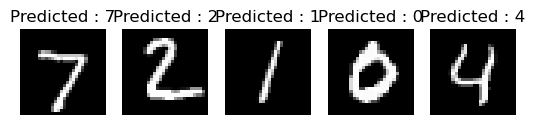

In [15]:
import numpy as np

test_value = 5

for i in range(test_value):
    plt.subplot(2, test_value, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted : {np.argmax(predictions[i] )}")

plt.show()